In [104]:
#importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge , Lasso
import matplotlib.pyplot as plt

In [2]:
#loading data
data = pd.read_csv("car.csv")

In [3]:
data.head(30)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
categorical_cols = ['Fuel_Type' , 'Transmission' ,  'Seller_Type' , 'Owner']

In [10]:
nominal_cols = ['Fuel_Type' , 'Transmission' ,  'Seller_Type' , 'Owner']

In [11]:
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']

In [12]:
#getting car age from the feature 'year'
data['Current_Year'] = datetime.now().year
data['Age_Of_Car']= data['Current_Year'] - data['Year']

In [13]:
#dropping unnecessary column
data.drop(['Car_Name', 'Year','Seller_Type' , 'Owner'] , axis = 1 , inplace = True)

In [14]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Current_Year,Age_Of_Car
0,3.35,5.59,27000,Petrol,Manual,2023,9
1,4.75,9.54,43000,Diesel,Manual,2023,10
2,7.25,9.85,6900,Petrol,Manual,2023,6
3,2.85,4.15,5200,Petrol,Manual,2023,12
4,4.60,6.87,42450,Diesel,Manual,2023,9


In [15]:
#applying onehotencoder on fuel_type
Cols = ['Fuel_Type']
def ApplyOneHotEncoding(data , Cols):
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(data[[Cols]])
    oheMatrix = ohe.transform(data[[Cols]])
    Encodings = pd.DataFrame(oheMatrix[:,:], columns = [Cols+col for col in ohe.categories_[0][:]])
    data.drop([Cols] , axis = 1 , inplace = True)
    data = pd.concat([data , Encodings],axis=1)
    return data
for col in Cols:
    data = ApplyOneHotEncoding(data ,col )

In [16]:
data.head(30)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Current_Year,Age_Of_Car,Fuel_TypeCNG,Fuel_TypeDiesel,Fuel_TypePetrol
0,3.35,5.59,27000,Manual,2023,9,0.0,0.0,1.0
1,4.75,9.54,43000,Manual,2023,10,0.0,1.0,0.0
2,7.25,9.85,6900,Manual,2023,6,0.0,0.0,1.0
3,2.85,4.15,5200,Manual,2023,12,0.0,0.0,1.0
4,4.60,6.87,42450,Manual,2023,9,0.0,1.0,0.0
5,9.25,9.83,2071,Manual,2023,5,0.0,1.0,0.0
6,6.75,8.12,18796,Manual,2023,8,0.0,0.0,1.0
7,6.50,8.61,33429,Manual,2023,8,0.0,1.0,0.0
8,8.75,8.89,20273,Manual,2023,7,0.0,1.0,0.0
9,7.45,8.92,42367,Manual,2023,8,0.0,1.0,0.0


In [17]:
#applying labelencoder on transmission
cols = ['Transmission']
def ApplyLableEncoder(data , cols):
    Encoder = LabelEncoder()
    Encoder.fit(data[cols])
    data[cols] = Encoder.transform(data[cols])
    return data
for col in cols:
    data = ApplyLableEncoder(data , col)

In [18]:
data.head(30)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Current_Year,Age_Of_Car,Fuel_TypeCNG,Fuel_TypeDiesel,Fuel_TypePetrol
0,3.35,5.59,27000,1,2023,9,0.0,0.0,1.0
1,4.75,9.54,43000,1,2023,10,0.0,1.0,0.0
2,7.25,9.85,6900,1,2023,6,0.0,0.0,1.0
3,2.85,4.15,5200,1,2023,12,0.0,0.0,1.0
4,4.60,6.87,42450,1,2023,9,0.0,1.0,0.0
5,9.25,9.83,2071,1,2023,5,0.0,1.0,0.0
6,6.75,8.12,18796,1,2023,8,0.0,0.0,1.0
7,6.50,8.61,33429,1,2023,8,0.0,1.0,0.0
8,8.75,8.89,20273,1,2023,7,0.0,1.0,0.0
9,7.45,8.92,42367,1,2023,8,0.0,1.0,0.0


In [19]:
#detecting outliers

In [20]:
Numerical_cols = ['Kms_Driven' , 'Present_Price' ]

In [21]:
#fixing ouliers with KNN

In [22]:
def FixOutliers(data ,col_name , idxs):
    data.loc[idxs , col_name] = np.nan
    Imputer = KNNImputer()
    Imputer.fit(data.loc[: , Numerical_cols])
    data.loc[: , Numerical_cols] = Imputer.transform(data.loc[: , Numerical_cols])
    return data

In [23]:
#detecting outliers with Zscore

In [24]:
#detecting outlier in numerical columns

def DetectOutliers_Zscore(data ,col_name):
    mean = data[col_name].mean()
    std = data[col_name].std()
    high_threshold = mean + 3 * std
    low_threshold = mean - 3 * std
    high_boolean_vector = data[col_name].values>high_threshold
    low_boolean_vector = data[col_name].values<low_threshold
    
    outlier_boolean_vector  = np.logical_or(high_boolean_vector  ,  low_boolean_vector)
    idxs = np.where(outlier_boolean_vector)[0]
    
    print("No. of Outliers detected" , len(idxs))
    plt.plot(data[col_name].values)
    plt.plot([high_threshold] * data.shape[0])
    plt.plot([low_threshold] * data.shape[0])
    plt.show()
    
    if len(idxs):
        data = FixOutliers(data , col_name , idxs) 
        print("After Fixing Outliers: ")
        plt.plot(data[col_name].values)
        plt.plot([high_threshold] * data.shape[0])
        plt.plot([low_threshold] * data.shape[0])
        plt.show()
    
    return data



No. of Outliers detected 3


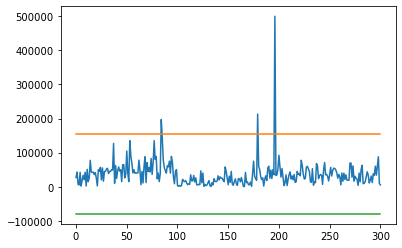

After Fixing Outliers: 


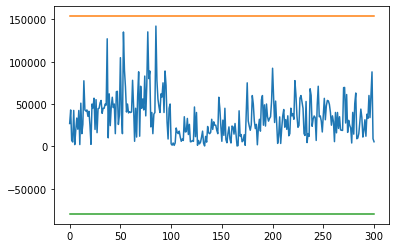

No. of Outliers detected 5


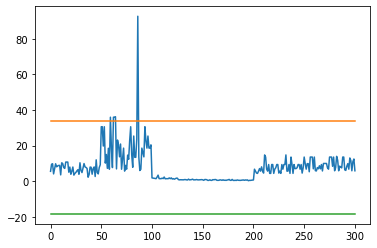

After Fixing Outliers: 


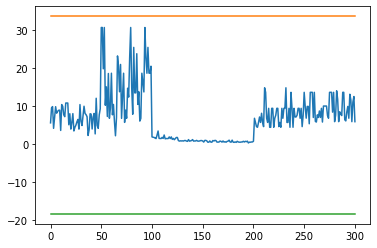

,Selling_Price,Present_Price,Kms_Driven,Transmission,Current_Year,Age_Of_Car,Fuel_TypeCNG,Fuel_TypeDiesel,Fuel_TypePetrol
0,3.35,5.59,27000.0,1,2023,9,0.0,0.0,1.0
1,4.75,9.54,43000.0,1,2023,10,0.0,1.0,0.0
2,7.25,9.85,6900.0,1,2023,6,0.0,0.0,1.0
3,2.85,4.15,5200.0,1,2023,12,0.0,0.0,1.0
4,4.60,6.87,42450.0,1,2023,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,1,2023,7,0.0,1.0,0.0
297,4.00,5.90,60000.0,1,2023,8,0.0,0.0,1.0
298,3.35,11.00,87934.0,1,2023,14,0.0,0.0,1.0
299,11.50,12.50,9000.0,1,2023,6,0.0,1.0,0.0


In [25]:
DetectOutliers_Zscore(data ,'Kms_Driven' )
DetectOutliers_Zscore(data ,'Present_Price')

In [26]:
#detecting outliers with InterQuantileRange

In [27]:
 #detecting outlier in numerical columns

def DetectOutliers_IQR(data ,col_name):
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25)
    high_threshold = q3 + 1.5 * (q3-q1)
    low_threshold = q3 - 1.5 * (q3-q1)
    high_boolean_vector = data[col_name].values>high_threshold
    low_boolean_vector = data[col_name].values<low_threshold
    
    outlier_boolean_vector  = np.logical_or(high_boolean_vector  ,  low_boolean_vector)
    idxs = np.where(outlier_boolean_vector)[0]
    
    print("No. of Outliers detected" , len(idxs))
    plt.plot(data[col_name].values)
    plt.plot([high_threshold] * data.shape[0])
    plt.plot([low_threshold] * data.shape[0])
    plt.show()
    
    if len(idxs):
        data = FixOutliers(data , col_name , idxs) 
        print("After Fixing Outliers: ")
        plt.plot(data[col_name].values)
        plt.plot([high_threshold] * data.shape[0])
        plt.plot([low_threshold] * data.shape[0])
        plt.show()
    
    return data

No. of Outliers detected 5


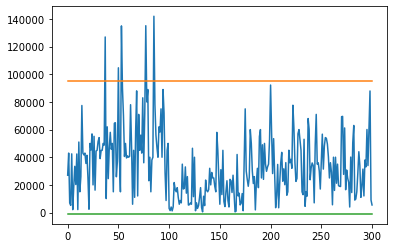

After Fixing Outliers: 


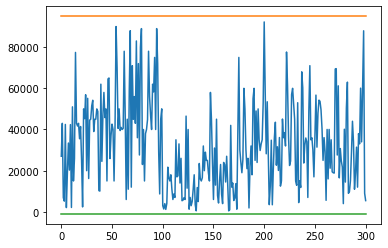

No. of Outliers detected 11


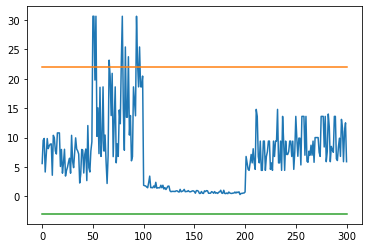

After Fixing Outliers: 


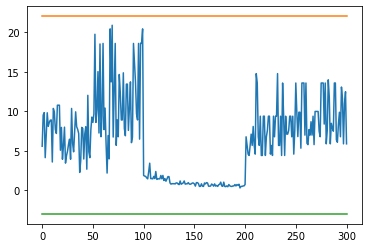

,Selling_Price,Present_Price,Kms_Driven,Transmission,Current_Year,Age_Of_Car,Fuel_TypeCNG,Fuel_TypeDiesel,Fuel_TypePetrol
0,3.35,5.59,27000.0,1,2023,9,0.0,0.0,1.0
1,4.75,9.54,43000.0,1,2023,10,0.0,1.0,0.0
2,7.25,9.85,6900.0,1,2023,6,0.0,0.0,1.0
3,2.85,4.15,5200.0,1,2023,12,0.0,0.0,1.0
4,4.60,6.87,42450.0,1,2023,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,1,2023,7,0.0,1.0,0.0
297,4.00,5.90,60000.0,1,2023,8,0.0,0.0,1.0
298,3.35,11.00,87934.0,1,2023,14,0.0,0.0,1.0
299,11.50,12.50,9000.0,1,2023,6,0.0,1.0,0.0


In [28]:
DetectOutliers_IQR(data ,'Kms_Driven' )
DetectOutliers_IQR(data ,'Present_Price')

In [76]:
#train , test , split
x , y= data.iloc[: , 1:] , data.iloc[: , 0]
x_train, x_test, y_train, y_test = train_test_split( x , y, random_state=0, test_size=0.2 , shuffle = True)

In [77]:
#Feature scaling
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [78]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

240
240
61
61


In [79]:
#define the metrices
1.MeanSquaredError
2.RootMeanSquaredError
3.R2Score
4.MeanAbsoluteError

In [93]:
def PrintTheMetrics(actual , predicted):
    print("MeanSquaredError: " , MeanSquaredError(y_test , predictions)) 
    print("RootMeanSquaredError: " , RootMeanSquaredError(y_test , predictions))
    print("R2Score: " , R2Score(y_test , predictions))
    print("MeanAbsoluteError: " , MeanAbsoluteError(y_test , predictions))

In [94]:
def MeanSquaredError(actual , predicted):
    Error = actual - predicted
    squaredError = np.square(actual - predicted)
    MSE = np.mean(squaredError)
    return MSE

In [95]:
def RootMeanSquaredError(actual , predicted):
    RMSE = np.sqrt(MeanSquaredError(actual , predicted))
    return RMSE

In [96]:
def  R2Score(actual, predicted):
    SSR = np.sum(np.square(actual - predicted))
    SSM = np.sum(np.square(actual - np.mean(actual)))
    return 1 - (SSR / SSM)

In [97]:
def MeanAbsoluteError(actual , predicted):
    return np.mean(np.abs(actual - predicted))

In [98]:
#define the model : LinearRegression

In [99]:
model = LinearRegression()
model.fit(x_train , y_train)
predictions = model.predict(x_test)
PrintTheMetrics(y_test , predictions)

MeanSquaredError:  8.82442866321452
RootMeanSquaredError:  2.970593991647886
R2Score:  0.6508953812216844
MeanAbsoluteError:  1.9610951843590188


In [ ]:
#define the model: RandomForestRegressor

In [101]:
model = RandomForestRegressor()
model.fit(x_train , y_train)
predictions = model.predict(x_test)
PrintTheMetrics(y_test , predictions)

MeanSquaredError:  5.985680048852455
RootMeanSquaredError:  2.446564948831822
R2Score:  0.7631995643758306
MeanAbsoluteError:  0.9335573770491797


In [102]:
#define the model :LassoRegression

In [105]:
model = Lasso()
model.fit(x_train , y_train)
predictions = model.predict(x_test)
PrintTheMetrics(y_test , predictions)

MeanSquaredError:  12.728185253148622
RootMeanSquaredError:  3.5676582309897094
R2Score:  0.49645824901239777
MeanAbsoluteError:  2.0836741254138316


In [ ]:
#define the model :RidgeRegression

In [106]:
model = Ridge()
model.fit(x_train , y_train)
predictions = model.predict(x_test)
PrintTheMetrics(y_test , predictions)

MeanSquaredError:  8.81427216500211
RootMeanSquaredError:  2.968883993187021
R2Score:  0.6512971840546937
MeanAbsoluteError:  1.9570543332320762


In [ ]:
#coclusion->RandomForestRegressor is working better for this dataset comparetively other models 

# MSE is less than other models ->A lower MSE means a better fit.

# MAE is nearly 1(0.93) since it's predicting car prices , a MAE of 1 is very good. 

# R2Score -> A score of 0.9 is very good, as it means that 90% of the variance in the data is explained by the model.It ranges from 0 to 1, and the higher the score, the better the model.
